In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
os.chdir('/content/drive/My Drive/DM')

Mounted at /content/drive


**zad. 1**

**1)**

In [ ]:
data_src = pd.read_csv('ED_lab_5/PersonsData.csv')
data = data_src.copy()
data

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Pietro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,1
B,172,70,12,4.3,5,1,4,12,0


**2)**


***odległość Euklidesa:***

In [ ]:
data.iloc[0,:]-data.iloc[1,:]

Wzrost (cm)       18.0
Waga (kg)         18.0
Staz (lata)       -9.0
Zarobki (tys.)    -0.8
Ocena (pkt.)       2.0
Pietro             5.0
Dzieci            -3.0
Odleglosc (km)    13.0
Ubezp.             1.0
dtype: float64

In [ ]:
np.sqrt(np.sum((data.iloc[0,:]-data.iloc[1,:])**2))

30.620907889871585

**3)**

In [ ]:
# z tys. złotych na złote:
data.iloc[0,3] = 3500
data.iloc[1,3] = 3500
data

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Pietro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3500.0,7,6,1,25,1
B,172,70,12,3500.0,5,1,4,12,0


In [ ]:
np.sqrt(np.sum((data.iloc[0,:]-data.iloc[1,:])**2))

30.610455730027933

**4)**

In [ ]:
# dzielenie przez odchylenie standardowe
np.seterr(divide='ignore', invalid='ignore')
for i in range(9):
  std = data.iloc[:,i].std()
  data.iloc[0,i] = data.iloc[0,i]/std
  data.iloc[1,i] = data.iloc[1,i]/std

In [ ]:
data.iloc[0,:]-data.iloc[1,:]

Wzrost (cm)       1.414214
Waga (kg)         1.414214
Staz (lata)      -1.414214
Zarobki (tys.)         NaN
Ocena (pkt.)      1.414214
Pietro            1.414214
Dzieci           -1.414214
Odleglosc (km)    1.414214
Ubezp.            1.414214
dtype: float64

In [ ]:
np.sqrt(np.sum((data.iloc[0,:]-data.iloc[1,:])**2))

4.0

**5)**

**odległość Minkowskiego:**

In [ ]:
pow(sum((data.iloc[0,:]-data.iloc[1,:])**2), 1/2)

30.620907889871585

In [ ]:
def minkowski(a, b, p=2):
    return pow(sum((abs(x-y)**p) for x,y in zip(a,b)), 1/p)

minkowski(data.iloc[0,:], data.iloc[1,:])

30.610455730027933

**odległość miejska:**

In [ ]:
sum(data.iloc[0,:]-data.iloc[1,:])

45.0

In [ ]:
#np.max(np.abs(data.iloc[0.:]-data.iloc[1.:]))

**zad. 2**

In [ ]:
data_src = pd.read_csv('ED_lab_5/BinaryData.csv')
data = data_src.copy()
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
A,0,0,1,1,0,1,0,1,0,1
B,0,0,0,1,1,1,0,0,0,1
C,1,0,1,1,0,1,1,1,0,0
D,1,1,1,1,0,0,0,0,0,0
E,1,0,1,0,1,0,0,0,0,0
F,0,0,0,1,0,1,0,0,0,0


In [ ]:
data.iloc[0,1]

0

In [ ]:
A = np.array([0,1,1,1,0])
B = np.array([1,1,0,1,0])

In [ ]:
np.sum(A*B == 1)

2

In [ ]:
np.sum(B-A == 1)

1

In [ ]:
np.sum(abs(A-B) == 1)

2

In [ ]:
n10 = np.sum(A-B == 1)
n10

1

**odległość Jaccard'a:**

In [ ]:
# v1
x = 0
y = 0
mJ = 100
wierszy = len((data.iloc[:, 0]))
kolumny = len((data.iloc[0, :]))

for i in range(wierszy-1):  
  for j in range(i+1, wierszy):
    n11 = np.sum(data.iloc[i] - data.iloc[j] == 0)
    n10 = np.sum(data.iloc[i] - data.iloc[j] == 1)
    n01 = np.sum(data.iloc[j] - data.iloc[i] == 1)
    J = n11 / (n11 + n10 + n01)       
    if mJ > J:
      mJ = J
      x = i
      y = j
    print(n11, n10, n01, n00, " Współczynnik Jaccard’a: ", J)
print("")
print("Najmniejszy współczynnik:        ",mJ,", ", data.iloc[x].name, "x", data.iloc[y].name)

7 2 1 5  Współczynnik Jaccard’a:  0.7
7 1 2 5  Współczynnik Jaccard’a:  0.7
5 3 2 5  Współczynnik Jaccard’a:  0.5
4 4 2 5  Współczynnik Jaccard’a:  0.4
7 3 0 5  Współczynnik Jaccard’a:  0.7
4 2 4 5  Współczynnik Jaccard’a:  0.4
4 3 3 5  Współczynnik Jaccard’a:  0.4
5 3 2 5  Współczynnik Jaccard’a:  0.5
8 2 0 5  Współczynnik Jaccard’a:  0.8
6 3 1 5  Współczynnik Jaccard’a:  0.6
5 4 1 5  Współczynnik Jaccard’a:  0.5
6 4 0 5  Współczynnik Jaccard’a:  0.6
7 2 1 5  Współczynnik Jaccard’a:  0.7
6 3 1 5  Współczynnik Jaccard’a:  0.6
5 3 2 5  Współczynnik Jaccard’a:  0.5

Najmniejszy współczynnik:         0.4 ,  A x E


In [ ]:
def dist(A, B):
  n10 = sum(A - B == 1)
  n01 = sum(B - A == 1)
  n11 = sum(A - B == 0)

  return n11 / (n10 + n01 + n11)

In [ ]:
#v2 (przy pomocy funkcji)
for i in range(0, 6):
  for j in range(i+1, 6):
    res = 0
    res = dist(data.iloc[i], data.iloc[j])
    print("Odległość między ", i+1, " i ", j+1, " = ", res)
    if (i == 0 and j == 1):
      min = res
    if res < min:
      min = res

print("")
print("Najmniejsza odległość: ", min)

Odległość między  1  i  2  =  0.7
Odległość między  1  i  3  =  0.7
Odległość między  1  i  4  =  0.5
Odległość między  1  i  5  =  0.4
Odległość między  1  i  6  =  0.7
Odległość między  2  i  3  =  0.4
Odległość między  2  i  4  =  0.4
Odległość między  2  i  5  =  0.5
Odległość między  2  i  6  =  0.8
Odległość między  3  i  4  =  0.6
Odległość między  3  i  5  =  0.5
Odległość między  3  i  6  =  0.6
Odległość między  4  i  5  =  0.7
Odległość między  4  i  6  =  0.6
Odległość między  5  i  6  =  0.5

Najmniejsza odległość:  0.4


In [ ]:
#v3 - przy pomocy funkcji wbudowanej:
from scipy.spatial import distance

for i in range(len(data)):
    for j in range(i + 1, len(data)):
        res = distance.jaccard(data.iloc[i,:], data.iloc[j,:])
        print("Odległość [", i+1, ",", j+1, "] = ", res)
        if i == 0 and j == 1:
          min = res
        if (res < min):
          min = res
          j_pos = j
          i_pos = i

print("")
print(min, "[", i_pos, "x", j_pos, "]")

# checking the result
#print(distance.jaccard(data.iloc[0,:], data.iloc[2,:]))

Odległość [ 1 , 2 ] =  0.5
Odległość [ 1 , 3 ] =  0.42857142857142855
Odległość [ 1 , 4 ] =  0.7142857142857143
Odległość [ 1 , 5 ] =  0.8571428571428571
Odległość [ 1 , 6 ] =  0.6
Odległość [ 2 , 3 ] =  0.75
Odległość [ 2 , 4 ] =  0.8571428571428571
Odległość [ 2 , 5 ] =  0.8333333333333334
Odległość [ 2 , 6 ] =  0.5
Odległość [ 3 , 4 ] =  0.5714285714285714
Odległość [ 3 , 5 ] =  0.7142857142857143
Odległość [ 3 , 6 ] =  0.6666666666666666
Odległość [ 4 , 5 ] =  0.6
Odległość [ 4 , 6 ] =  0.8
Odległość [ 5 , 6 ] =  1.0

0.42857142857142855 [ 0 x 2 ]


**odległość Dice'a:**

In [ ]:
#v1
x = 0
y = 0
mD = 100
wierszy = len((data.iloc[:, 0]))

for i in range(wierszy-1):  
  for j in range(i+1, wierszy):
    n11 = np.sum(data.iloc[i] - data.iloc[j] == 0)
    n10 = np.sum(data.iloc[i] - data.iloc[j] == 1)
    n01 = np.sum(data.iloc[j] - data.iloc[i] == 1)
    D = (2*n11) / ((2*n11) + n10 + n01)       
    if mD > D:
      mD = D
      x = i
      y = j
    print(n11, n10, n01, " Współczynnik Dice'a: ", D)
print("")
print("Najmniejszy współczynnik:   ",mD,", ", data.iloc[x].name, "x", data.iloc[y].name)

7 2 1  Współczynnik Dice'a:  0.8235294117647058
7 1 2  Współczynnik Dice'a:  0.8235294117647058
5 3 2  Współczynnik Dice'a:  0.6666666666666666
4 4 2  Współczynnik Dice'a:  0.5714285714285714
7 3 0  Współczynnik Dice'a:  0.8235294117647058
4 2 4  Współczynnik Dice'a:  0.5714285714285714
4 3 3  Współczynnik Dice'a:  0.5714285714285714
5 3 2  Współczynnik Dice'a:  0.6666666666666666
8 2 0  Współczynnik Dice'a:  0.8888888888888888
6 3 1  Współczynnik Dice'a:  0.75
5 4 1  Współczynnik Dice'a:  0.6666666666666666
6 4 0  Współczynnik Dice'a:  0.75
7 2 1  Współczynnik Dice'a:  0.8235294117647058
6 3 1  Współczynnik Dice'a:  0.75
5 3 2  Współczynnik Dice'a:  0.6666666666666666

Najmniejszy współczynnik:    0.5714285714285714 ,  A x E


In [ ]:
def dice(A, B):
  n10 = sum(A - B == 1)
  n01 = sum(B - A == 1)
  n11 = sum(A - B == 0)

  return (2*n11) / ((2*n10) + n01 + n11)

In [ ]:
#v2 (przy pomocy funkcji)
for i in range(0, 6):
  for j in range(i+1, 6):
    res = 0
    res = dice(data.iloc[i], data.iloc[j])
    print("Odległość między ", i+1, " i ", j+1, " = ", res)
    if (i == 0 and j == 1):
      min = res
    if res < min:
      min = res
print("\n")
print("Najmniejsza odległość: ", min)

Odległość między  1  i  2  =  1.1666666666666667
Odległość między  1  i  3  =  1.2727272727272727
Odległość między  1  i  4  =  0.7692307692307693
Odległość między  1  i  5  =  0.5714285714285714
Odległość między  1  i  6  =  1.0769230769230769
Odległość między  2  i  3  =  0.6666666666666666
Odległość między  2  i  4  =  0.6153846153846154
Odległość między  2  i  5  =  0.7692307692307693
Odległość między  2  i  6  =  1.3333333333333333
Odległość między  3  i  4  =  0.9230769230769231
Odległość między  3  i  5  =  0.7142857142857143
Odległość między  3  i  6  =  0.8571428571428571
Odległość między  4  i  5  =  1.1666666666666667
Odległość między  4  i  6  =  0.9230769230769231
Odległość między  5  i  6  =  0.7692307692307693


Najmniejsza odległość:  0.5714285714285714


In [ ]:
# przy pomocy funkcji wbudowanej:
from scipy.spatial import distance

for i in range(len(data)):
    for j in range(i + 1, len(data)):
        res = distance.dice(data.iloc[i,:], data.iloc[j,:])
        print("Odległość [", i+1, ",", j+1, "] = ", res)
        if i == 0 and j == 1:
          min = res
        if (res < min):
          min = res
          j_pos = j
          i_pos = i

print("")
print(min, "[", i_pos, "x", j_pos, "]")

# checking the result
#print(distance.dice(data.iloc[0,:], data.iloc[2,:]))

Odległość [ 1 , 2 ] =  0.3333333333333333
Odległość [ 1 , 3 ] =  0.2727272727272727
Odległość [ 1 , 4 ] =  0.5555555555555556
Odległość [ 1 , 5 ] =  0.75
Odległość [ 1 , 6 ] =  0.42857142857142855
Odległość [ 2 , 3 ] =  0.6
Odległość [ 2 , 4 ] =  0.75
Odległość [ 2 , 5 ] =  0.7142857142857143
Odległość [ 2 , 6 ] =  0.3333333333333333
Odległość [ 3 , 4 ] =  0.4
Odległość [ 3 , 5 ] =  0.5555555555555556
Odległość [ 3 , 6 ] =  0.5
Odległość [ 4 , 5 ] =  0.42857142857142855
Odległość [ 4 , 6 ] =  0.6666666666666666
Odległość [ 5 , 6 ] =  1.0

0.2727272727272727 [ 0 x 2 ]


**zad. 5**

In [13]:
data_src = pd.read_csv('ED_lab_5/SkokiNarciarskie.csv')
data = data_src.copy()
data

,x0,x1,n
0,105,110,1
1,110,115,6
2,115,120,10
3,120,125,10
4,125,130,15
5,130,135,2
6,135,140,6


In [14]:
table1 = pd.DataFrame(data) #Table with the first three columns
x0 = table1["x0"]
x1 = table1["x1"]
n = table1["n "]
#NewData = np.concatenate([n,x1], axis = 1)

df1 = pd.DataFrame({'x0': x0})
df2 = pd.DataFrame({'n': n})
#NewData = np.concatenate([n, x1], axis = 1, ignore_index=True)
result = pd.concat([n, x1], axis=1, ignore_index=True)
result

,0,1
0,1,110
1,6,115
2,10,120
3,10,125
4,15,130
5,2,135
6,6,140


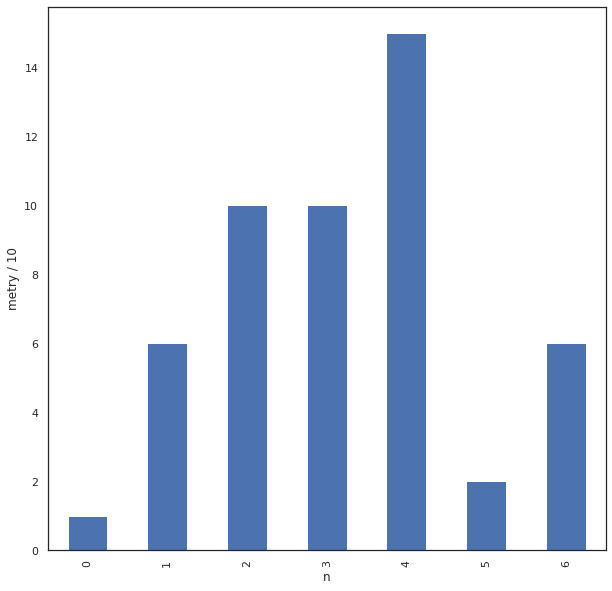

In [15]:
result[0].plot(kind='bar')
plt.ylabel('metry / 10')
plt.xlabel('n')
plt.title('')

plt.show()

In [ ]:
#result = pd.concat([x1, n], axis=1, ignore_index=True)
#plt.hist(result, bins=10, range=(0,140), edgecolor='black')
#plt.show()

In [ ]:
all_values = np.concatenate([x0,x1,n], axis = 0)
all_values

array([105, 110, 115, 120, 125, 130, 135, 110, 115, 120, 125, 130, 135,
       140,   1,   6,  10,  10,  15,   2,   6])

In [ ]:
#import statistics
from scipy import stats

print('\nWartość średnia skoków:')
print(n.mean())

print('\nModa:')
print(stats.mode(all_values, axis=None))

print('\nMediana:')
print(np.median(all_values))

print('\nWartość średnia:')
print(all_values.mean())

# skośność
print('\nSkośność (funkcja wbudowana):')
from scipy.stats import linregress
print(linregress(x0, n))

print('\nSkośność (obliczona):')
t_x1 = x0[0]
t_x2 = x0[6]
t_y1 = n[0]
t_y2 = n[6]
print("x1: ", t_x1, ", x2:", t_x2)
print("y1: ", t_y1, ",   y2:", t_y2)
print((t_y2 - t_y1) / (t_x2 - t_x1))


Wartość średnia skoków:
7.142857142857143

Moda:
ModeResult(mode=array([6]), count=array([2]))

Mediana:
115.0

Wartość średnia:
84.04761904761905

Skośność (funkcja wbudowana):
LinregressResult(slope=0.08571428571428572, intercept=-3.1428571428571432, rvalue=0.1884222879063983, pvalue=0.6857722860840837, stderr=0.199795814137681)

Skośność (obliczona):
x1:  105 , x2: 135
y1:  1 ,   y2: 6
0.16666666666666666


In [ ]:
print('\nKwartyle.:')
data.quantile([0.25,0.5,0.75])


Kwartyle.:


,x0,x1,n
0.25,112.5,117.5,4.0
0.50,120.0,125.0,6.0
0.75,127.5,132.5,10.0


In [ ]:
data.quantile(.75, axis = 0)

x0    127.5
x1    132.5
n      10.0
Name: 0.75, dtype: float64

In [ ]:
n_array = np.concatenate([n], axis = 0)
n_array.sort()

n_size = len(n_array)

i1 = int(1 * n_size/4)
i2 = int(2 * n_size/4)
i3 = int(3 * n_size/4)
i4 = int(4 * n_size/4)

 
Q1 = ((n_array[i1] + n_array[i1+1]) / 2)
Q2 = ((n_array[i2] + n_array[i2+1]) / 2)
Q3 = ((n_array[i3] + n_array[i3+1]) / 2)
Q4 = n_array[6]

print("Q1: ", Q1, "\nQ2:", Q2, "\nQ3:", Q3, "\nQ4:", Q4)

IQR = Q3 - Q1
print("Rozstęp: ", IQR)


Q1:  4.0 
Q2: 8.0 
Q3: 12.5 
Q4: 15
Rozstęp:  8.5


In [7]:
import seaborn as sns
 
#pd.options.display.max_columns = 100

df = pd.read_csv('ED_lab_5/SkokiNarciarskie.csv')
df

,x0,x1,n
0,105,110,1
1,110,115,6
2,115,120,10
3,120,125,10
4,125,130,15
5,130,135,2
6,135,140,6


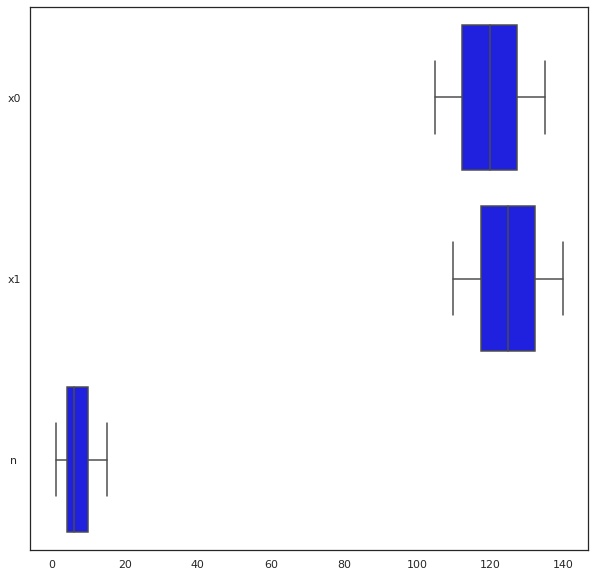

In [11]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax = sns.boxplot(data=df, orient='h', color = 'blue')